In [ ]:
!python --version

Python 3.8.16


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

In [ ]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [ ]:
!tar xf spark-3.3.1-bin-hadoop3.tgz

In [ ]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 45 kB/s 
     |████████████████████████████████| 200 kB 22.2 MB/s 
     |████████████████████████████████| 199 kB 15.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=1e643faf5fca7868c00f441d71e2ff37d19c390d319f249be328901d03814396
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.master("local[*]")

In [ ]:
spark

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
#Importing Libraries for Models 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error,classification_report,confusion_matrix,r2_score
from sklearn import datasets, linear_model,metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#Versions of the Libraries
!python --version
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

Python 3.8.16
1.21.6
1.3.5
0.11.2


In [ ]:
sns.set_theme()

In [ ]:
#Data Import
countries = pd.read_csv('/content/countries_gdp.csv')

In [ ]:
#Data Description
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [ ]:
countries.tail() 

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,"31,3","0,00",0,"67,69",1900.0,"90,7","26,8","8,32","0,34","91,34",2,"28,01","21,84","0,179","0,243","0,579"


In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [ ]:
print(countries.isnull().sum())

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


In [ ]:
countries.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [ ]:
#Renaming Columns
countries.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality_rate","gdp_per_capita",
                  "literacy_rate","telecom","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])

In [ ]:
#Coverting the String Values to Categorical Values
countries.country = countries.country.astype('category')
countries.region = countries.region.astype('category')
#Coverting the String Values to Numnerical Values
countries.density = countries.density.str.replace(",",".").astype(float)
countries.coastline_area_ratio = countries.coastline_area_ratio.str.replace(",",".").astype(float)
countries.net_migration = countries.net_migration.str.replace(",",".").astype(float)
countries.infant_mortality_rate = countries.infant_mortality_rate.str.replace(",",".").astype(float)
countries.literacy_rate = countries.literacy_rate.str.replace(",",".").astype(float)
countries.telecom = countries.telecom.str.replace(",",".").astype(float)
countries.arable = countries.arable.str.replace(",",".").astype(float)
countries.crops = countries.crops.str.replace(",",".").astype(float)
countries.other = countries.other.str.replace(",",".").astype(float)
countries.climate = countries.climate.str.replace(",",".").astype(float)
countries.birthrate = countries.birthrate.str.replace(",",".").astype(float)
countries.deathrate = countries.deathrate.str.replace(",",".").astype(float)
countries.agriculture = countries.agriculture.str.replace(",",".").astype(float)
countries.industry = countries.industry.str.replace(",",".").astype(float)
countries.service = countries.service.str.replace(",",".").astype(float)



In [ ]:
#Checking the DataType After Conversion
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   country                227 non-null    category
 1   region                 227 non-null    category
 2   population             227 non-null    int64   
 3   area                   227 non-null    int64   
 4   density                227 non-null    float64 
 5   coastline_area_ratio   227 non-null    float64 
 6   net_migration          224 non-null    float64 
 7   infant_mortality_rate  224 non-null    float64 
 8   gdp_per_capita         226 non-null    float64 
 9   literacy_rate          209 non-null    float64 
 10  telecom                223 non-null    float64 
 11  arable                 225 non-null    float64 
 12  crops                  225 non-null    float64 
 13  other                  225 non-null    float64 
 14  climate                205 non-null    flo

In [ ]:
countries.count()

country                  227
region                   227
population               227
area                     227
density                  227
coastline_area_ratio     227
net_migration            224
infant_mortality_rate    224
gdp_per_capita           226
literacy_rate            209
telecom                  223
arable                   225
crops                    225
other                    225
climate                  205
birthrate                224
deathrate                223
agriculture              212
industry                 211
service                  212
dtype: int64

In [ ]:
countries.describe()

,population,area,density,coastline_area_ratio,net_migration,infant_mortality_rate,gdp_per_capita,literacy_rate,telecom,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


[Text(30.5, 0.5, 'Data Points'),
 Text(0.5, 11.59375, 'Columns'),
 Text(0.5, 1.0, 'Missing Data')]

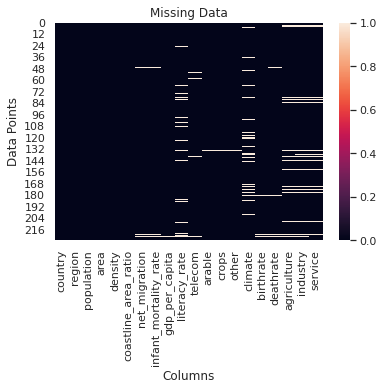

In [ ]:
sns.heatmap(countries.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

In [ ]:
countries.climate.unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

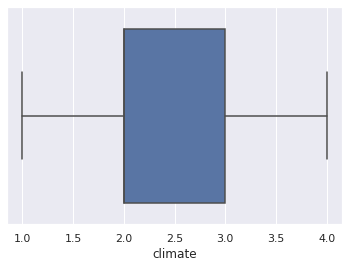

In [ ]:
sns.boxplot(x=countries["climate"])

In [ ]:
countries['net_migration'].fillna(0, inplace=True)
countries['infant_mortality_rate'].fillna(0, inplace=True)
countries['gdp_per_capita'].fillna(2500, inplace=True)
countries['literacy_rate'].fillna(countries.groupby('region')['literacy_rate'].transform('mean'), inplace= True)
countries['telecom'].fillna(countries.groupby('region')['telecom'].transform('mean'), inplace= True)
countries['arable'].fillna(0, inplace=True)
countries['crops'].fillna(0, inplace=True)
countries['other'].fillna(0, inplace=True)
countries['climate'].fillna(0, inplace=True)
countries['birthrate'].fillna(countries.groupby('region')['birthrate'].transform('mean'), inplace= True)
countries['deathrate'].fillna(countries.groupby('region')['deathrate'].transform('mean'), inplace= True)
countries['agriculture'].fillna(0.17, inplace=True)
countries['service'].fillna(0.8, inplace=True)
countries['industry'].fillna((1 - countries['agriculture'] - countries['service']), inplace= True)

In [ ]:
#Checking After Filling Missing Values
print(countries.isnull().sum())

country                  0
region                   0
population               0
area                     0
density                  0
coastline_area_ratio     0
net_migration            0
infant_mortality_rate    0
gdp_per_capita           0
literacy_rate            0
telecom                  0
arable                   0
crops                    0
other                    0
climate                  0
birthrate                0
deathrate                0
agriculture              0
industry                 0
service                  0
dtype: int64


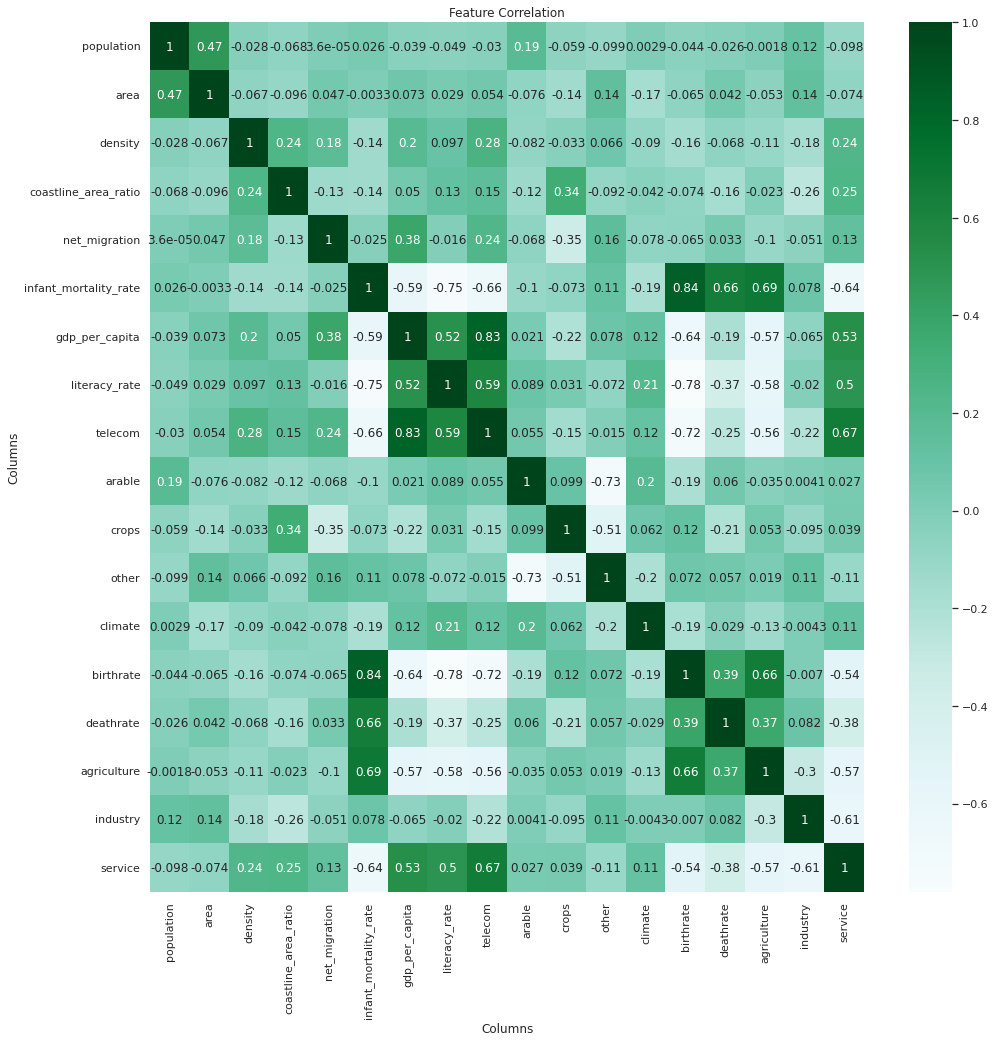

In [ ]:
#Correlation Map
fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(countries.corr(), annot=True, ax=ax, cmap='BuGn').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

[Text(30.5, 0.5, 'Data Points'),
 Text(0.5, 11.59375, 'Columns'),
 Text(0.5, 1.0, 'Missing Data')]

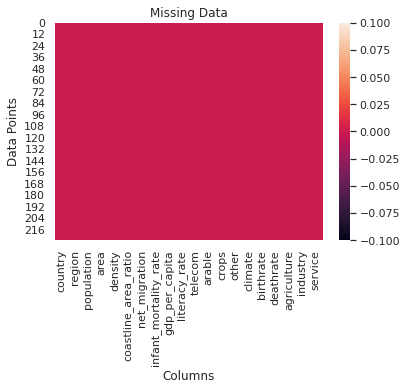

In [ ]:
sns.heatmap(countries.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

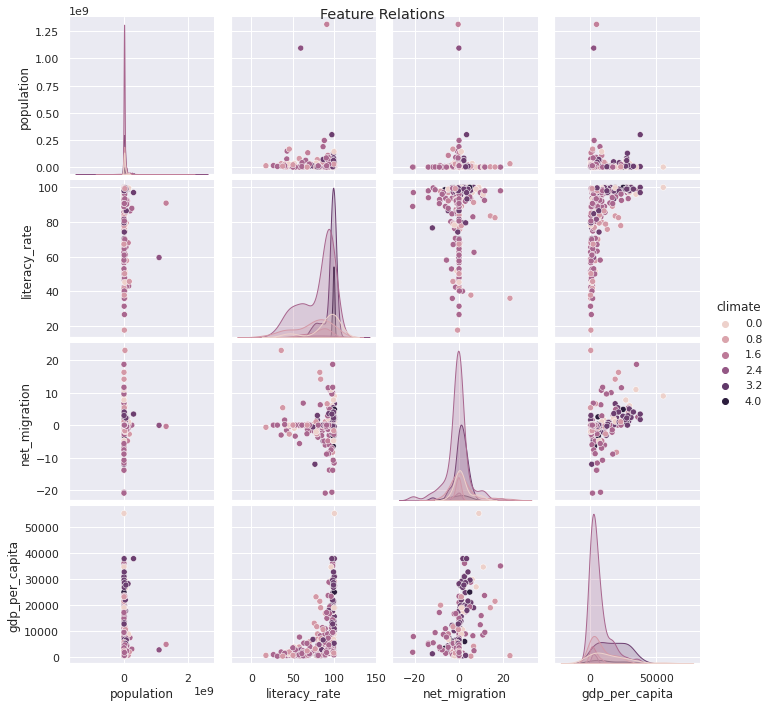

In [ ]:
g = sns.pairplot(countries[['population', 'literacy_rate', 'net_migration', 'gdp_per_capita', 'climate']], hue='climate')
g.fig.suptitle('Feature Relations')
plt.show()

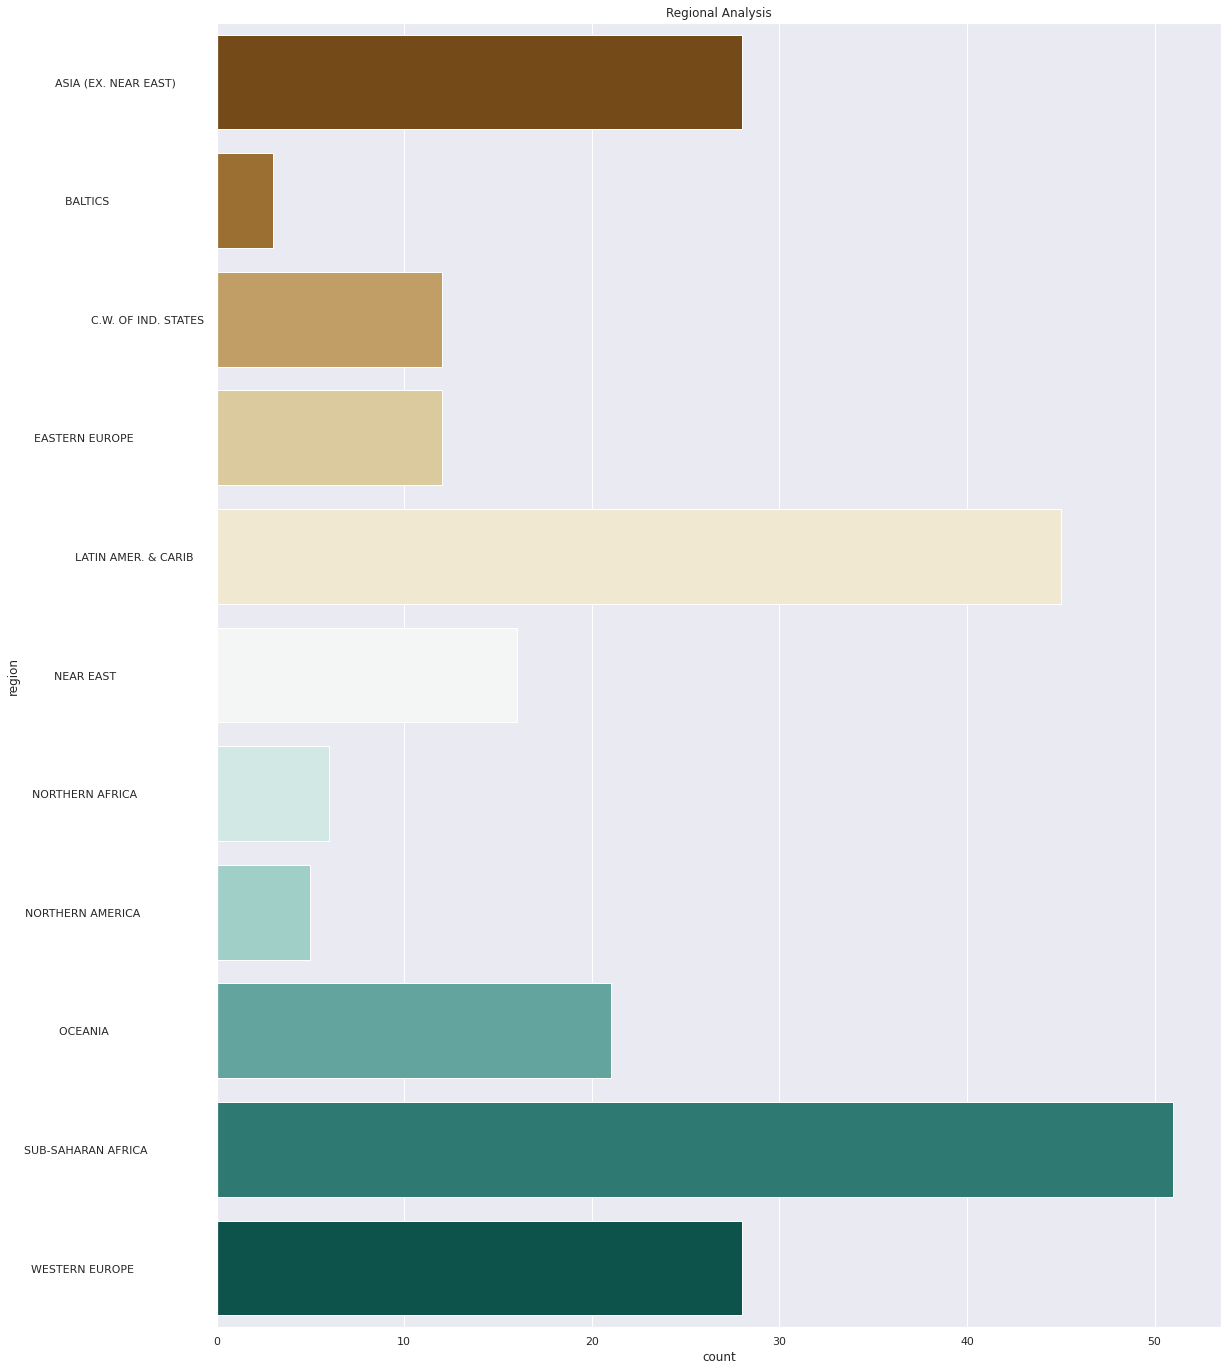

In [ ]:
#Region Analysis
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Analysis')
ax1 = fig.add_subplot(1, 1, 1)
sns.countplot(data= countries, y= 'region', ax= ax1, palette='BrBG')
plt.show()

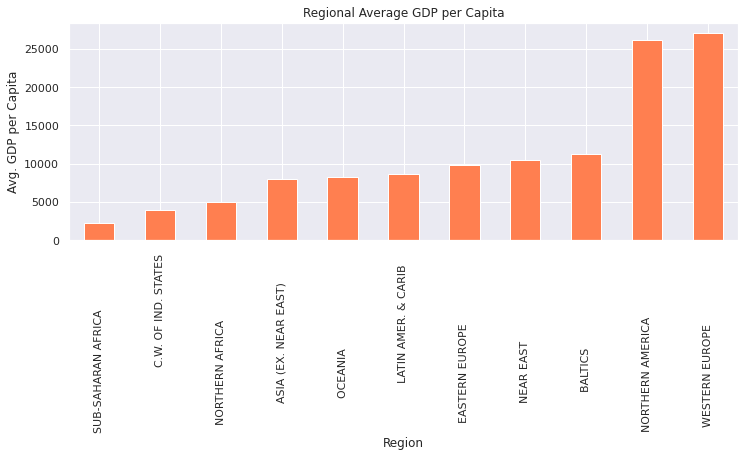

In [ ]:
#GDP Analysis with Region
fig = plt.figure(figsize=(12, 4))
countries.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Avg. GDP per Capita')
plt.show()

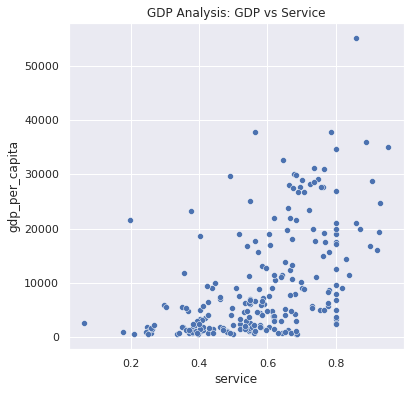

In [ ]:
#GDP vs Service
fig = plt.figure(figsize=(6, 6))
sns.scatterplot(data= countries, x= 'service', y= 'gdp_per_capita')
plt.title('GDP Analysis: GDP vs Service')
plt.show()

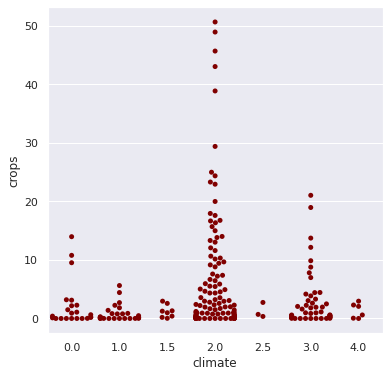

In [ ]:
#Which Climate is  suitable for the Large Production of Crops 
fig = plt.figure(figsize=(6, 6))
sns.swarmplot(x='climate',y='crops',data=countries,color='maroon')
plt.show()

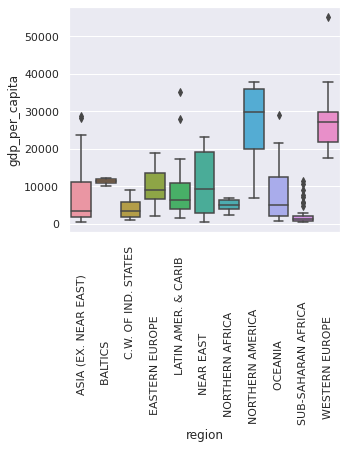

In [ ]:
#GDP Vs Region
sns.boxplot(y=countries['gdp_per_capita'],x= countries['region'])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

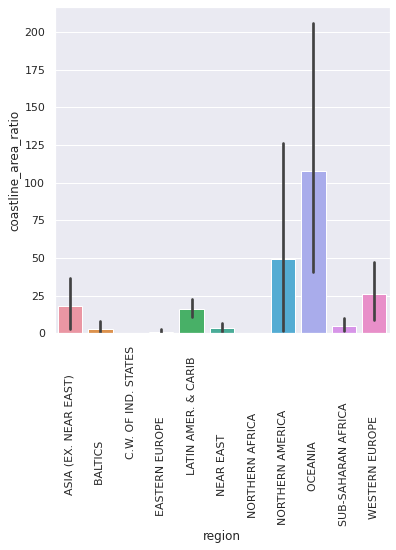

In [ ]:
#Which Region has the more of CoastlandArea
fig = plt.figure(figsize=(6, 6))
sns.barplot(x='region',y='coastline_area_ratio',data=countries)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Country vs Industry
industry = countries.loc[:,['country','industry']]
industry.sort_values(by = ['industry'],inplace=True,ascending=False)
industry_bar = px.bar(industry[:10],x='country',y='industry',title="Top 10 Countries with Most Industry")
industry_bar.show()


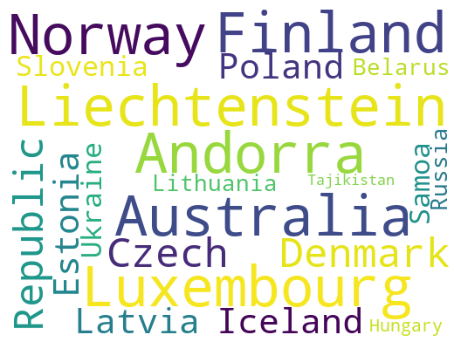

In [ ]:
#Top Countries with Highest Literacy Rate 
literacy_rate = countries.loc[:,['country','literacy_rate']]
literacy_rate.columns=['country','literacy_rate']
highest_literacy_rate=literacy_rate.sort_values(by='literacy_rate',ascending=False)[:20]
literacy_rate_countries = highest_literacy_rate.country
plt.subplots(figsize=(8,8))
highest_literacy_rate_wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(literacy_rate_countries))
plt.imshow(highest_literacy_rate_wordcloud)
plt.axis('off')
plt.savefig('literacy.png')

plt.show()

In [ ]:
#Which Country Uses Most of their Land for Production of Crops
most_used_arable=countries.loc[:,['country','arable']]
most_used_arable=most_used_arable.sort_values(by='arable',ascending=False)
arable_bar=px.bar(most_used_arable[:10],x='country',y='arable',  barmode='group',color='arable')
arable_bar.show()

In [ ]:
#Finding Countries Leading Sectors
agri=list(countries['agriculture'])
ind=list(countries['industry'])
serv=list(countries['service'])
gdp=list(countries['gdp_per_capita'])
leading_sector=[]
for i in range(227):
    x=max(agri[i],ind[i],serv[i])
    if x== agri[i]:
        leading_sector.append('agriculture')
    elif x==ind[i]:
        leading_sector.append('industry')
    elif x==serv[i]:
        leading_sector.append('service')
country = list(countries.country)
dataSector = pd.DataFrame ({"Country":country,"Agriculture":agri,"Industry":ind,"Service":serv,"LeadingSector":leading_sector, "GDP":gdp})
dataSector.head()
fig = px.scatter(dataSector, x="Country", y="GDP",color="LeadingSector")
fig.show()

In [ ]:
#Countries Which uses most of the Mobile Technology 
telecom_countries = countries.loc[:,['country','telecom']]
telecom_countries=telecom_countries.sort_values(by='telecom',ascending=False)
fig = px.scatter(telecom_countries, x="country", y="telecom",title="The Country uses most of their Mobile Technology")

fig.show()

In [ ]:
#Sector Distribution
dataSector=countries.loc[:,['country','agriculture','industry','service','gdp_per_capita']]
dataSector.dropna(inplace=True)

sector_distribution = px.scatter_3d(dataSector, x='agriculture', y='industry', z='service',
                    color='country',
                    title='Sector Distribution',  
                   )
sector_distribution.show()

In [ ]:
#Top 5 countries in terms of coastline

countries[["country","region","coastline_area_ratio"]].sort_values(by='coastline_area_ratio',ascending=False).head(5).set_index("country")

,region,coastline_area_ratio
country,,
"Micronesia, Fed. St.",OCEANIA,870.66
Palau,OCEANIA,331.66
N. Mariana Islands,OCEANIA,310.69
Maldives,ASIA (EX. NEAR EAST),214.67
Monaco,WESTERN EUROPE,205.00


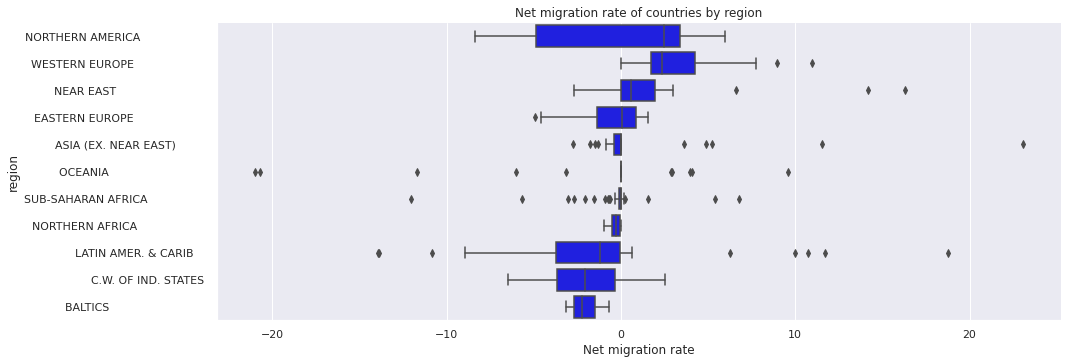

In [ ]:
#Boxplot of Net migration of countries by region
sort_net_migration = countries.groupby('region')['net_migration'].median().sort_values(ascending=False).index
migration = sns.catplot(data=countries,y="region",x="net_migration",kind="box",color="blue",height=5,aspect=3,order=sort_net_migration)
plt.title("Net migration rate of countries by region")
plt.xlabel("Net migration rate")
plt.show()

In [ ]:
#Top 5 countries in terms of crops Production

countries[["country","region","crops"]].sort_values(by='crops',ascending=False).head(5).set_index("country")

,region,crops
country,,
Kiribati,OCEANIA,50.68
Sao Tome & Principe,SUB-SAHARAN AFRICA,48.96
"Micronesia, Fed. St.",OCEANIA,45.71
Tonga,OCEANIA,43.06
Marshall Islands,OCEANIA,38.89


In [ ]:
#Countries with Least Literacy Rate 
lowest_literacy_rate =countries[["country","region","literacy_rate"]].sort_values(by='literacy_rate',ascending=False).set_index("country")
lowest_literacy_rate[~lowest_literacy_rate['literacy_rate'].isna()].sort_values(by='literacy_rate').head(5)

,region,literacy_rate
country,,
Niger,SUB-SAHARAN AFRICA,17.6
Burkina Faso,SUB-SAHARAN AFRICA,26.6
Sierra Leone,SUB-SAHARAN AFRICA,31.4
Guinea,SUB-SAHARAN AFRICA,35.9
Afghanistan,ASIA (EX. NEAR EAST),36.0


In [ ]:
#Bottom 5 countries in terms of Mobile Technology
telecom_lowest = countries[["country","region","telecom"]].sort_values(by='telecom',ascending=False).set_index("country")
telecom_lowest [~telecom_lowest ['telecom'].isna()].sort_values(by='telecom').head(5)

,region,telecom
country,,
"Congo, Dem. Rep.",SUB-SAHARAN AFRICA,0.2
Chad,SUB-SAHARAN AFRICA,1.3
Niger,SUB-SAHARAN AFRICA,1.9
Liberia,SUB-SAHARAN AFRICA,2.3
Central African Rep.,SUB-SAHARAN AFRICA,2.3


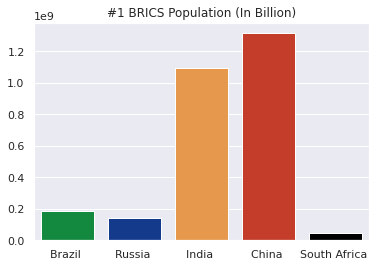

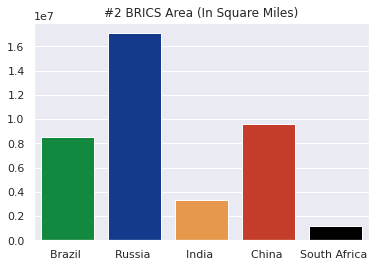

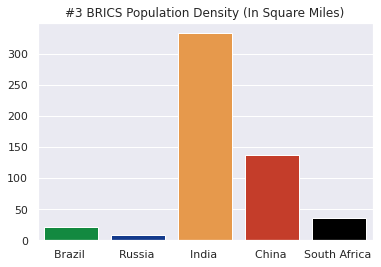

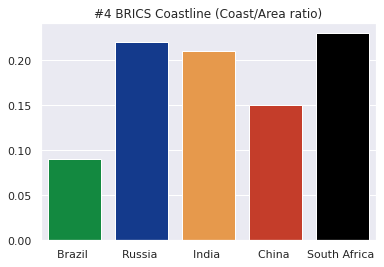

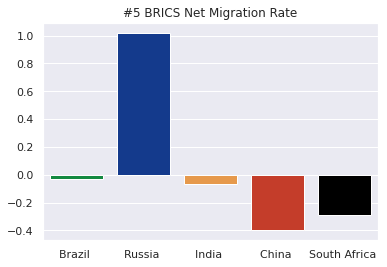

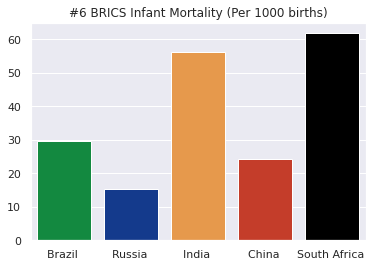

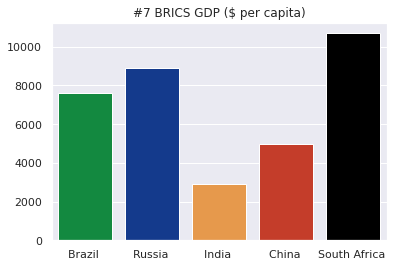

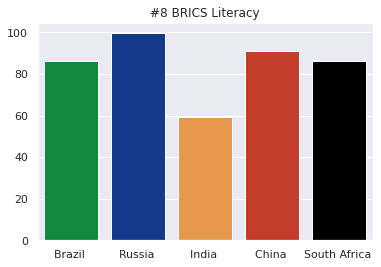

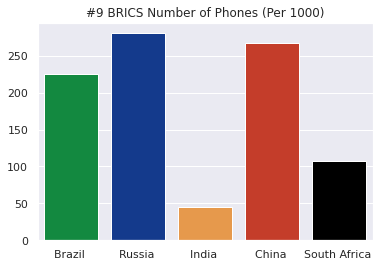

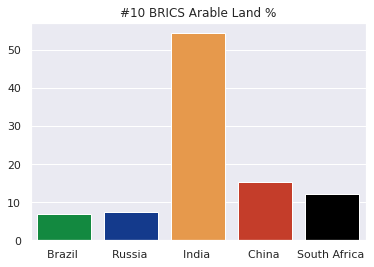

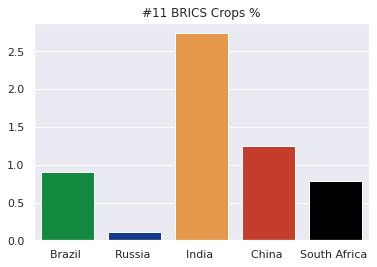

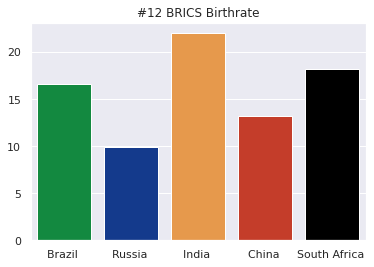

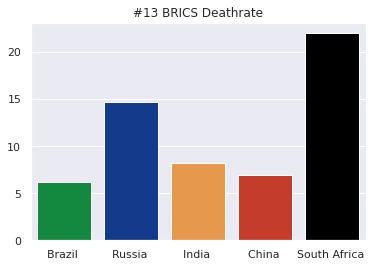

In [ ]:
#Filter data for BRICS countries
brics = countries.country.isin(["Brazil ","Russia ","India ","China ","South Africa "])
brics = countries[brics]
#Define function to make plots for BRICS countries
def brics_function(y,title):
    palette = {"Brazil ":"#009C3B","Russia ":"#0033A0","India ":"#FF9933","China ":"#DE2910","South Africa ":"#000000"}
    sns.barplot(data=brics,x="country",y=y,palette=palette,order=["Brazil ","Russia ","India ","China ","South Africa "])
    plt.ylabel("")
    plt.xlabel("")
    plt.title(title)
    plt.show()
#Generate multiple plots using for loop
brics_dict = {"population":"#1 BRICS Population (In Billion)","area":"#2 BRICS Area (In Square Miles)","density":"#3 BRICS Population Density (In Square Miles)",
              "coastline_area_ratio":"#4 BRICS Coastline (Coast/Area ratio)","net_migration":"#5 BRICS Net Migration Rate",'infant_mortality_rate':"#6 BRICS Infant Mortality (Per 1000 births)", 
              'gdp_per_capita':"#7 BRICS GDP ($ per capita)",'literacy_rate':"#8 BRICS Literacy",'telecom':"#9 BRICS Number of Phones (Per 1000)",'arable':"#10 BRICS Arable Land %",
              'crops':"#11 BRICS Crops %",'birthrate':"#12 BRICS Birthrate",'deathrate':"#13 BRICS Deathrate"}
for key,value in brics_dict.items():
    brics_function(key,value)  

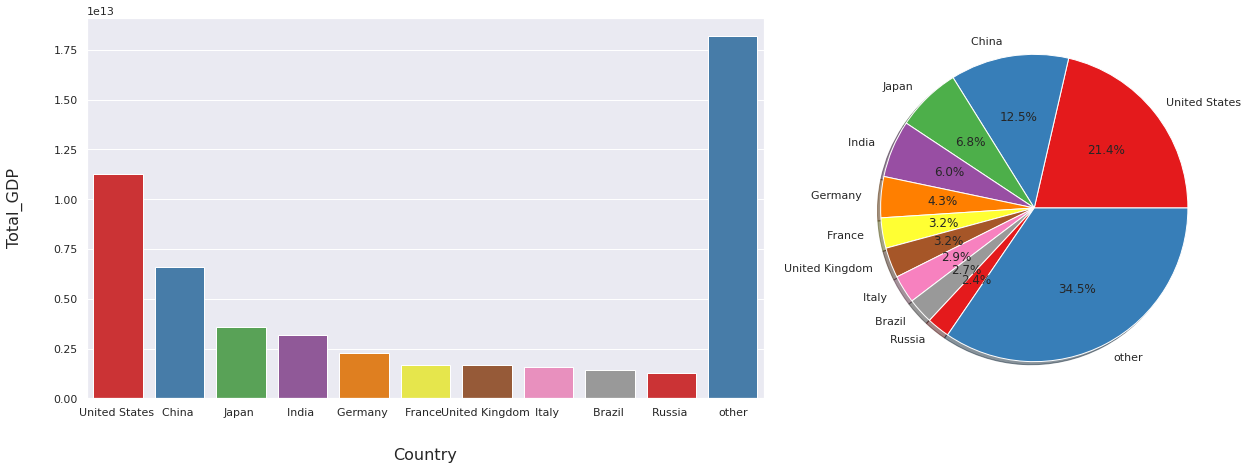

In [ ]:
# Top 10 Coutries with highest total GDPs
countries['Total_gdp'] = countries['gdp_per_capita'] * countries['population']
#plt.figure(figsize=(16,6))
top_gdp_countries = countries.sort_values('Total_gdp',ascending=False).head(10)
other = pd.DataFrame({'country':['other'], 'Total_gdp':[countries['Total_gdp'].sum() - top_gdp_countries['Total_gdp'].sum()]})
gdps = pd.concat([top_gdp_countries[['country','Total_gdp']],other],ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7),gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='country',y='Total_gdp',data=gdps,ax=axes[0],palette='Set1')
axes[0].set_xlabel('Country',labelpad=30,fontsize=16)
axes[0].set_ylabel('Total_GDP',labelpad=30,fontsize=16)

colors = sns.color_palette("Set1", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_gdp'], labels=gdps['country'],colors=colors,autopct='%1.1f%%',shadow=True)
axes[1].axis('equal')
plt.show()

In [ ]:

# Compared the above ten countries rank in total GDP and GDP per capita
Rank1 = countries[['country','Total_gdp']].sort_values('Total_gdp', ascending=False).reset_index()
Rank2 = countries[['country','gdp_per_capita']].sort_values('gdp_per_capita', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('Rank of Total GDP - Rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.country]
     

Rank of Total GDP - Rank of GDP per capita:


country
United States        1
China              119
Japan               14
India              147
Germany             15
France              15
United Kingdom      12
Italy               17
Brazil              84
Russia              75
dtype: int64

In [ ]:
LE = LabelEncoder()
countries['region_label'] = LE.fit_transform(countries['region'])
countries['climate_label'] = LE.fit_transform(countries['climate'])
countries.head()
     

,country,region,population,area,density,coastline_area_ratio,net_migration,infant_mortality_rate,gdp_per_capita,literacy_rate,...,other,climate,birthrate,deathrate,agriculture,industry,service,Total_gdp,region_label,climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,87.65,1.0,46.60,20.34,0.380,0.240,0.380,2.173990e+10,0,1
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,74.49,3.0,15.11,5.22,0.232,0.188,0.579,1.611745e+10,3,5
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,96.53,1.0,17.14,4.61,0.101,0.600,0.298,1.975805e+11,6,1
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,75.00,2.0,22.46,3.27,0.170,0.030,0.800,4.623520e+08,8,3
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,97.78,3.0,8.71,6.25,0.170,0.030,0.800,1.352819e+09,10,5


In [ ]:
# countries_final = pd.concat([countries,pd.get_dummies(countries['region'], prefix='region')], axis=1).drop(['region'],axis=1)

In [ ]:
# Training and Testing the data - All features
train, test = train_test_split(countries, test_size=0.2, shuffle=True)
training_features = ['population', 'area', 'density',
       'coastline_area_ratio', 'net_migration', 'infant_mortality_rate', 'literacy_rate', 'telecom', 'arable', 'crops',
       'other', 'birthrate', 'deathrate', 'agriculture', 'industry',
       'service', 'region_label', 'climate_label']
target = 'gdp_per_capita'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]
     

In [ ]:
print(train_X.shape) 
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(181, 18)
(181,)
(46, 18)
(46,)


In [ ]:
# linear regression model
lnmodel = LinearRegression()
lnmodel.fit(train_X, train_Y)
train_pred_Y = lnmodel.predict(train_X)
test_pred_Y = lnmodel.predict(test_X)
print('Linear Regression Performance:')

print('\nall features')
print('Training Score : ',lnmodel.score(train_X,train_Y))
print('MAE:', metrics.mean_absolute_error(test_Y, test_pred_Y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_Y, test_pred_Y)))
print('R2_Score: ', metrics.r2_score(test_Y, test_pred_Y))

Linear Regression Performance:

all features
Training Score :  0.7795885604987189
MAE: 2916.0063408861974
RMSE: 3969.584287463979
R2_Score:  0.7455979086117499


rmse_train: 4803.530923957395 msle_train: 6.843504889987076
rmse_test: 3959.154812223453 msle_test: 2.3633779524971237
Training Score :  0.7795885604987189
Test score :  0.7292348137800093


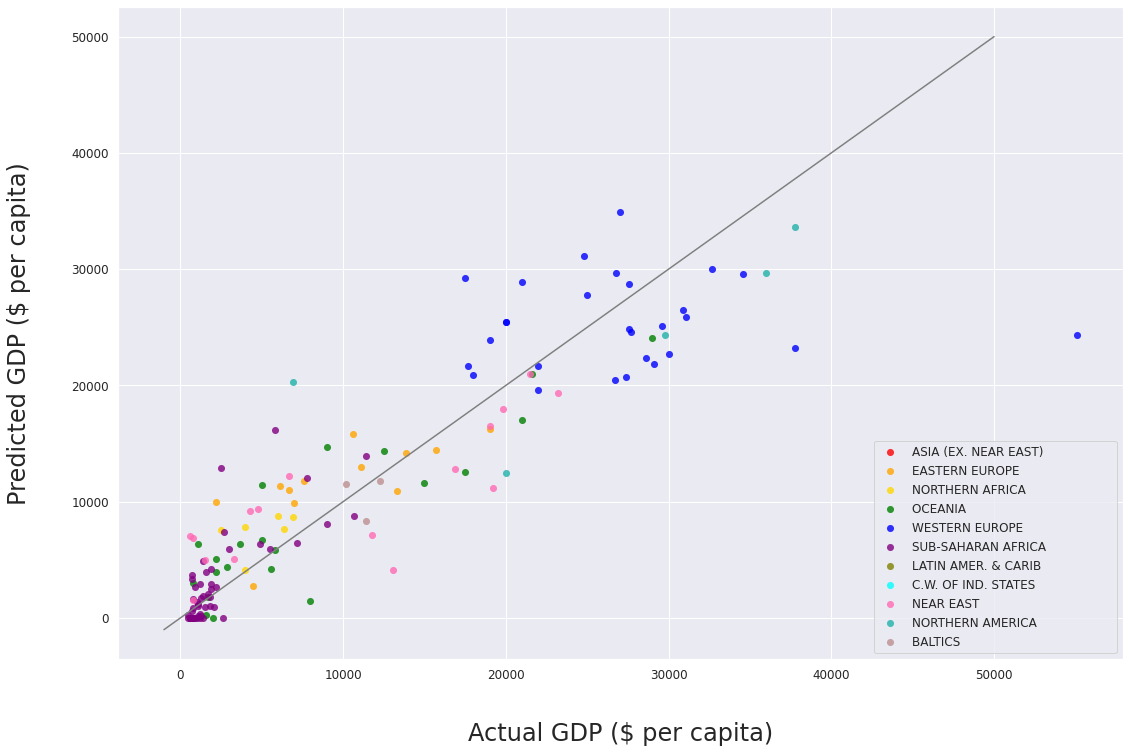

In [ ]:
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)
rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)
print('Training Score : ',lnmodel.score(train_X,train_Y))
print('Test score : ',r2_score(test_pred_Y,test_Y))

plt.figure(figsize=(18,12))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)
data_shuffled = countries.loc[train_test_Y.index]
label = data_shuffled['country']

colors = {'ASIA (EX. NEAR EAST)               ':'red',
          'EASTERN EUROPE                     ':'orange',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'purple',
          'LATIN AMER. & CARIB                ':'olive',
          'C.W. OF IND. STATES                ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'lightseagreen',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[data_shuffled['region']==region]
    Y = train_test_pred_Y.loc[data_shuffled['region']==region]
    ax = sns.regplot(x=X, y=Y, marker='.', fit_reg=False, color=color, scatter_kws={'s':200, 'linewidths':0}, label=region) 
plt.legend(loc=4,prop={'size': 12})  

ax.set_xlabel('Actual GDP ($ per capita)',labelpad=40)
ax.set_ylabel('Predicted GDP ($ per capita)',labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)
x = np.linspace(-1000,50000,100) # 100 linearly spaced numbers
y = x
plt.plot(x,y,c='gray')

Coefficients: [ 3.24010408e-06  2.91264061e-05 -1.59121506e-01 -1.04266977e+00
  4.10776687e+02 -1.59509150e+00 -8.97324749e+00  2.76403435e+01
  5.84086369e+01  4.92489316e+01  7.58195632e+01 -1.84593288e+02
 -3.12126777e+01 -2.09197626e+04 -1.08811823e+04 -1.68368893e+04
  5.57879180e+02  2.56059085e+02]
Variance score:0.7455979086117499


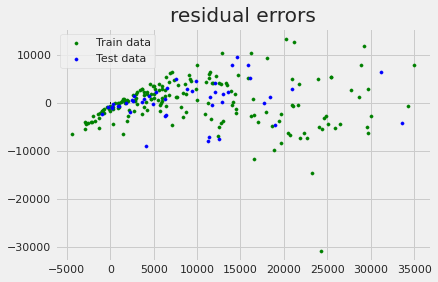

In [ ]:
# linear regression model
reg= linear_model.LinearRegression()
reg.fit(train_X, train_Y)

print('Coefficients:', reg.coef_)
#variance score 1 means perfect prediction
print('Variance score:{}'.format(reg.score(test_X,test_Y)))

plt.style.use('fivethirtyeight')

plt.scatter(reg.predict(train_X), reg.predict(train_X) - train_Y,
            color = 'green', s= 10, label='Train data')

plt.scatter(reg.predict(test_X), reg.predict(test_X) - test_Y,
            color = 'blue', s= 10, label='Test data')

plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

plt.legend(loc = 'best')

plt.title('residual errors')

plt.show()


In [ ]:
# Random forest model.
rgmodel = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
rgmodel.fit(train_X, train_Y)
train_pred_Y = rgmodel.predict(train_X)
test_pred_Y = rgmodel.predict(test_X)
print('Random Forest Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(test_Y, test_pred_Y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_Y, test_pred_Y)))
print('R2_Score: ', metrics.r2_score(test_Y, test_pred_Y))


Random Forest Performance:

all features, No scaling:
MAE: 2281.665539948738
RMSE: 3351.1521536834407
R2_Score:  0.8186911868950755


Variance score:0.8186911868950755


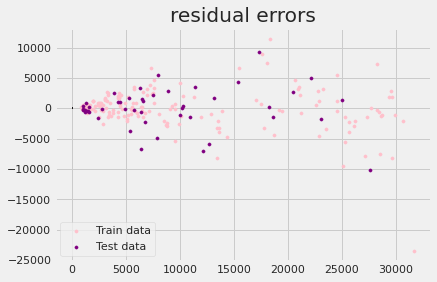

In [ ]:
# RandomForest model
reg= RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
reg.fit(train_X, train_Y)

#variance score 1 means perfect prediction

print('Variance score:{}'.format(reg.score(test_X,test_Y)))

plt.style.use('fivethirtyeight')

plt.scatter(reg.predict(train_X), reg.predict(train_X) - train_Y,
            color = 'pink', s= 10, label='Train data')

plt.scatter(reg.predict(test_X), reg.predict(test_X) - test_Y,
            color = 'purple', s= 10, label='Test data')

plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

plt.legend(loc = 'best')

plt.title('residual errors')

plt.show()

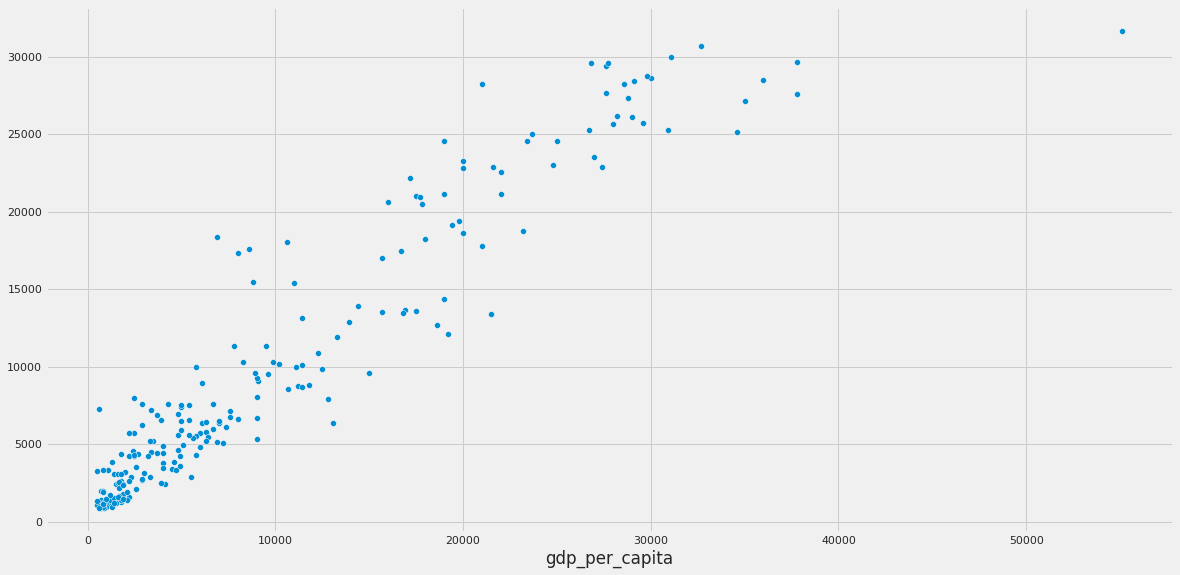

In [ ]:
plt.figure(figsize=(18,9))
whole=rgmodel.predict(countries[training_features])
sns.scatterplot(x=countries[target],y=whole) 

In [ ]:
#Decision Tree Model
dereg = DecisionTreeRegressor(random_state=0)
dereg.fit(train_X, train_Y)
train_pred_Y = dereg.predict(train_X)
test_pred_Y = dereg.predict(test_X)
train_pred_Y = dereg.predict(train_X)
test_pred_Y = dereg.predict(test_X)
print('DecisionTree Performance:')
print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(test_Y, test_pred_Y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_Y, test_pred_Y)))
print('R2_Score: ', metrics.r2_score(test_Y, test_pred_Y))


DecisionTree Performance:

all features, No scaling:
MAE: 3530.4347826086955
RMSE: 5093.346042931255
R2_Score:  0.5811707656284322


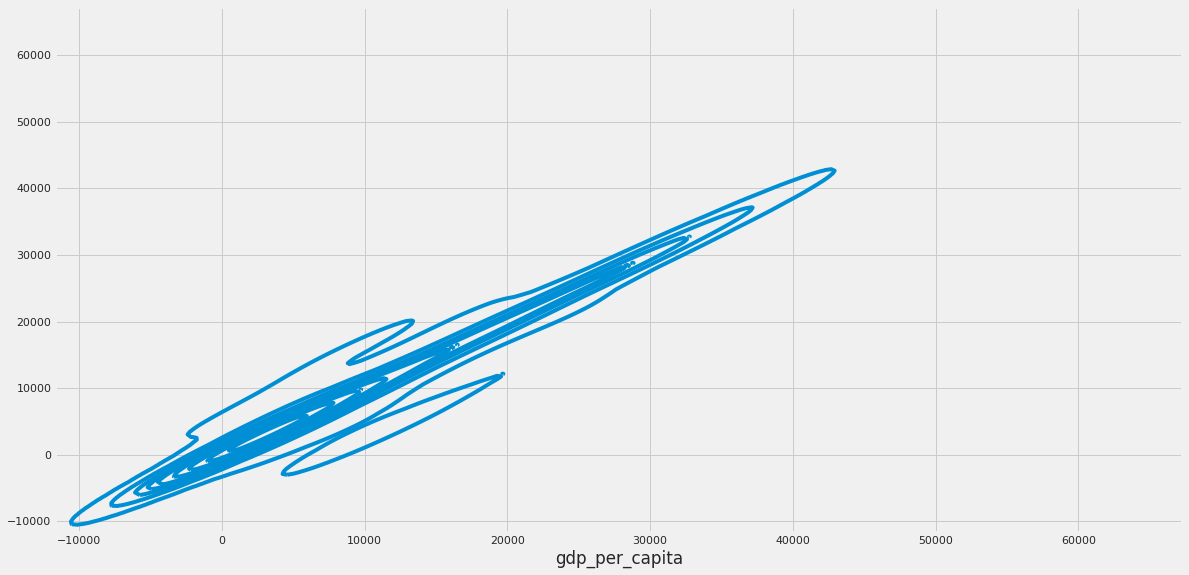

In [ ]:
plt.figure(figsize=(18,9))
whole=dereg.predict(countries[training_features])
sns.kdeplot(x=countries[target],y=whole) 

In [ ]:
#GradientBoostingRegressor
gbm_opt = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,
                                        max_depth=5, min_samples_split=10, 
                                        min_samples_leaf=1, subsample=0.7,
                                        max_features=7, random_state=101)
gbm_opt.fit(train_X, train_Y)
train_pred_Y = gbm_opt.predict(train_X)
test_pred_Y = gbm_opt.predict(test_X)
print('GradientBoosting Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(test_Y, test_pred_Y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_Y, test_pred_Y)))
print('R2_Score: ', metrics.r2_score(test_Y, test_pred_Y))


GradientBoosting Performance:

all features, No scaling:
MAE: 1946.0180329983941
RMSE: 2971.6569846051475
R2_Score:  0.8892850046247132


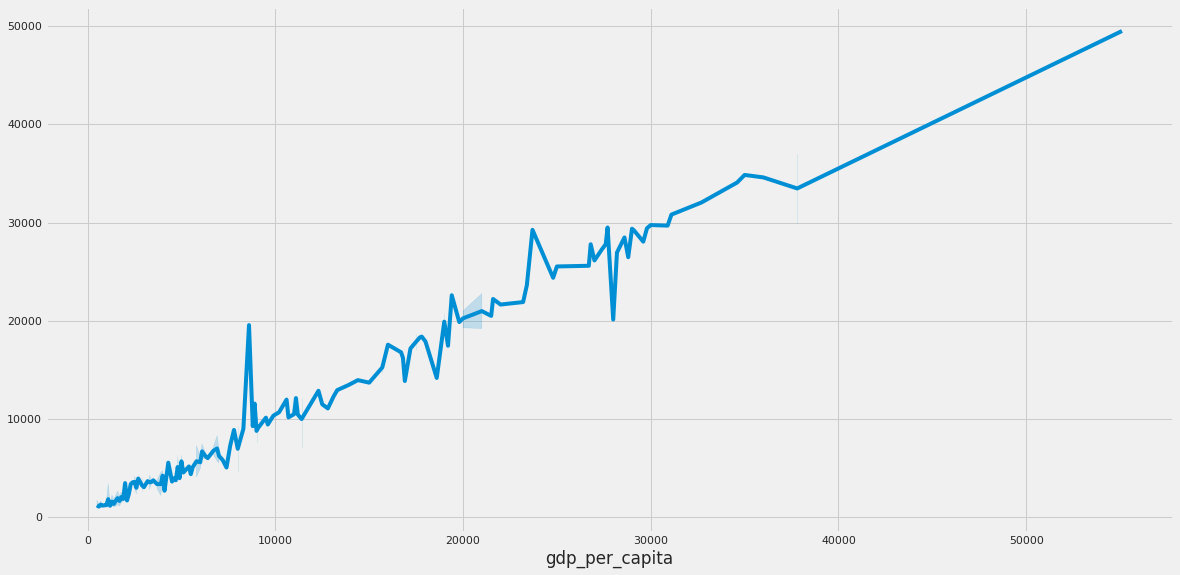

In [ ]:
plt.figure(figsize=(18,9))
whole=gbm_opt.predict(countries[training_features])
sns.lineplot(x=countries[target],y=whole) 

In [ ]:
training_features

['population',
 'area',
 'density',
 'coastline_area_ratio',
 'net_migration',
 'infant_mortality_rate',
 'literacy_rate',
 'telecom',
 'arable',
 'crops',
 'other',
 'birthrate',
 'deathrate',
 'agriculture',
 'industry',
 'service',
 'region_label',
 'climate_label']

In [ ]:
#We will try to predict GDP per capita of Two Imaginary Countries
df = pd.DataFrame(columns = training_features)
df = df.append({'population':50000, 'area':3287263,
       'density':152.0, 'coastline_area_ratio':2.0,
       'net_migration':0.0, 'infant_mortality_rate':5,
       'literacy_rate':99.0, 'telecom':1000,
       'arable':60, 'crops':10, 'other':30, 'birthrate':10,
       'deathrate':5, 'region_label':0,
       'climate_label':0,'industry':1.0,'service':1.2,'agriculture':1.5},ignore_index = True) 
df


,population,area,density,coastline_area_ratio,net_migration,infant_mortality_rate,literacy_rate,telecom,arable,crops,other,birthrate,deathrate,agriculture,industry,service,region_label,climate_label
0,50000.0,3287263.0,152.0,2.0,0.0,5.0,99.0,1000.0,60.0,10.0,30.0,10.0,5.0,1.5,1.0,1.2,0.0,0.0


In [ ]:
gbm_opt.predict(df)

array([21233.58382717])

In [ ]:
# Training and Testing the data - Selected features
train, test = train_test_split(countries, test_size=0.2, shuffle=True)
selected_training_features = [ 'density', 'net_migration', 'literacy_rate', 'telecom','birthrate', 'agriculture','service']
target = 'gdp_per_capita'
train_X = train[selected_training_features]
train_Y = train[target]
test_X = test[selected_training_features]
test_Y = test[target]

In [ ]:
# linear regression model
lnmodel = LinearRegression()
lnmodel.fit(train_X, train_Y)
train_pred_Y = lnmodel.predict(train_X)
test_pred_Y = lnmodel.predict(test_X)

print('Linear Regression Performance:')

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(test_Y, test_pred_Y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_Y, test_pred_Y)))
print('R2_Score: ', metrics.r2_score(test_Y, test_pred_Y))

Linear Regression Performance:

selected features, No scaling:
MAE: 2756.650407315581
RMSE: 4212.380731956613
R2_Score:  0.7839160101386748


In [ ]:
#RandomForestmodel
rgmodel = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
rgmodel.fit(train_X, train_Y)
train_pred_Y = rgmodel.predict(train_X)
test_pred_Y = rgmodel.predict(test_X)
print('Random Forest Performance:')

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(test_Y, test_pred_Y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_Y, test_pred_Y)))
print('R2_Score: ', metrics.r2_score(test_Y, test_pred_Y))

Random Forest Performance:

selected features, No scaling:
MAE: 2611.7371647028845
RMSE: 3659.221192412362
R2_Score:  0.8369410354820547


In [ ]:
#Decision Tree Model
dereg = DecisionTreeRegressor(random_state=0)
dereg.fit(train_X, train_Y)
train_pred_Y = dereg.predict(train_X)
test_pred_Y = dereg.predict(test_X)

print('DecisionTree Performance:')

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(test_Y, test_pred_Y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_Y, test_pred_Y)))
print('R2_Score: ', metrics.r2_score(test_Y, test_pred_Y))

DecisionTree Performance:

selected features, No scaling:
MAE: 2902.1739130434785
RMSE: 4199.922359530823
R2_Score:  0.7851922831225246


In [ ]:
#GradientBoostingRegressor
gbm_opt = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,
                                        max_depth=5, min_samples_split=10, 
                                        min_samples_leaf=1, subsample=0.7,
                                        max_features=7, random_state=101)
gbm_opt.fit(train_X, train_Y)
train_pred_Y = gbm_opt.predict(train_X)
test_pred_Y = gbm_opt.predict(test_X)

print('GradientBoosting Performance:')

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(test_Y, test_pred_Y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_Y, test_pred_Y)))
print('R2_Score: ', metrics.r2_score(test_Y, test_pred_Y))

GradientBoosting Performance:

selected features, No scaling:
MAE: 2606.2887255236997
RMSE: 3734.134321374401
R2_Score:  0.8301962695588256
